# TCS iON INTERNSHIP

# HR Salary Dashboard - Train the Dataset and Predict Salary

The objective is to predict whether a person's salary is higher or lower than $50k/year based on their attributes using several Machine Learning classification models.

In [1]:
# IMPORTING LIBRARIES

In [2]:
### Data Wrangling

import pandas as pd
import numpy as np

### Data Visualization

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Remove unnecessary warnings
import warnings
warnings.filterwarnings('ignore')



#### Importing the data

In [3]:
#LOAD THE DATASET TO PYTHON ENVIRONMENT
data = pd.read_csv("salarydata.csv")

In [4]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Data exploration

In [5]:
#PRINT THE FIRST 5 LINES OF THE  DATASET
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
#PRINT THE LAST 5 LINES OF THE  DATASET
data.tail()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [7]:
#SHAPE OF THE TRAIN DATASET
data.shape

(32561, 14)

## Data Pre-Processing

In [8]:
#DISPLAY THE FULL SUMMARY OF THE DATAFRAME.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [9]:
#STATISTICS SUMMARY OF THE DATAFRAME.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [10]:
#STATISTICS SUMMARY OF THE DATAFRAME OF OBJECT DATATYPE.
data.describe(include='object').T

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital-status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native-country,32561,42,United-States,29170
salary,32561,2,<=50K,24720


In [11]:
# CHECK DATATYPES
data.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [12]:
# DISPLAY THE COLUMN NAMES OF THE DATASET
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

In [13]:
# Finding the null values in dataset.
data.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

While analyzing the dataset, it is clear that capital-gain & capital_loss have no significance in salary prediction. so we can drop it. The column,education-num is the numerical version of the column education, so we also drop it.

In [14]:
##  drop the unnecessary columns such as capital-gain','capital-loss','education-num as they do not contribute to target.
data.drop(['capital-gain','capital-loss','education-num'], axis = 1,inplace = True)
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [15]:
#UNIQUE OCCURENCE OF EACH VARIABLE
for i in data.columns:
    print(i,':',data[i].nunique(),'\n')

age : 73 

workclass : 9 

education : 16 

marital-status : 7 

occupation : 15 

relationship : 6 

race : 5 

sex : 2 

hours-per-week : 94 

native-country : 42 

salary : 2 



In [16]:
cat_var = []

for column in data:
    if data[column].dtype == 'O':
        cat_var.append(column)
cat_var

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'salary']

In [17]:
# finding the unique values in each categorical variables
for col in cat_var:
    print('\n', col, '\n', data[col].unique(), '\n', '---' * 40)


 workclass 
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 
 ------------------------------------------------------------------------------------------------------------------------

 education 
 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 
 ------------------------------------------------------------------------------------------------------------------------

 marital-status 
 ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 
 ------------------------------------------------------------------------------------------------------------------------

 occupation 
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-in

In [18]:
# replace '?' row with nan
# to apply the changes to whole dataframe
data.replace('?', np.NaN, inplace=True)

In [19]:
# finding the unique values in each categorical variables
for col in cat_var:
    print('\n', col, '\n', data[col].unique(), '\n', '---' * 40)


 workclass 
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 
 ------------------------------------------------------------------------------------------------------------------------

 education 
 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 
 ------------------------------------------------------------------------------------------------------------------------

 marital-status 
 ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 
 ------------------------------------------------------------------------------------------------------------------------

 occupation 
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-in

In [20]:
data.dtypes

age                int64
workclass         object
education         object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
hours-per-week     int64
native-country    object
salary            object
dtype: object

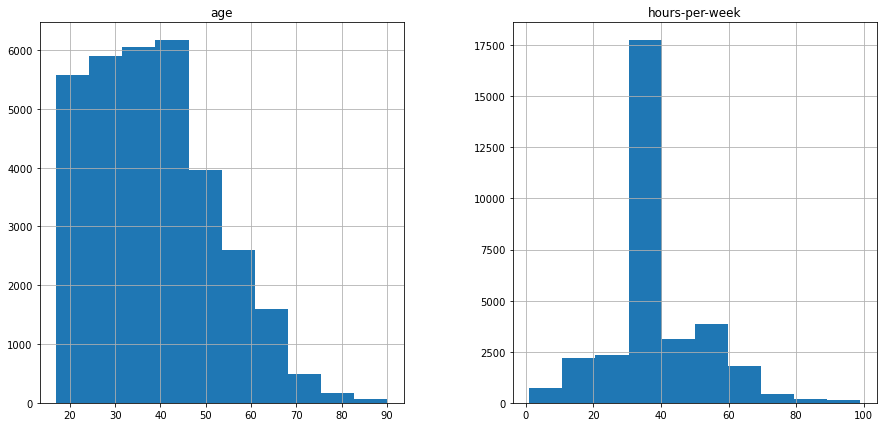

In [21]:
freqgraph = data.select_dtypes(include = ['int'])
freqgraph.hist(figsize =(15,7))
plt.show()

In [22]:
#filling missing values using mode

for i in ['workclass', 'occupation', 'native-country']:     
    data[i]=data[i].fillna(data[i].mode()[0])

In [23]:
num_cols =  data.select_dtypes(["int"])
#get the valuecounts
for i in num_cols.columns:
    print(num_cols[i].value_counts())
    print("-"*50)
    print("\n")

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
--------------------------------------------------


40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: hours-per-week, Length: 94, dtype: int64
--------------------------------------------------




In [24]:
cat_cols =  data.select_dtypes(["object"])
#get the valuecounts
for i in cat_cols.columns:
    print(cat_cols[i].value_counts())
    print("-"*50)
    print("\n")

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
--------------------------------------------------


HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
--------------------------------------------------


Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64
----------------------

## EXPLORATORY DATA ANALYSIS

### UNIVARIATE ANALYSIS

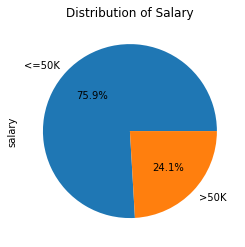

In [25]:
data['salary'].value_counts().plot.pie(autopct='%.1f%%')
plt.title("Distribution of Salary")
plt.rcParams['figure.figsize'] = (10,5)
plt.show() 

Approximately 75.9% of salaries are $50,000 or less.

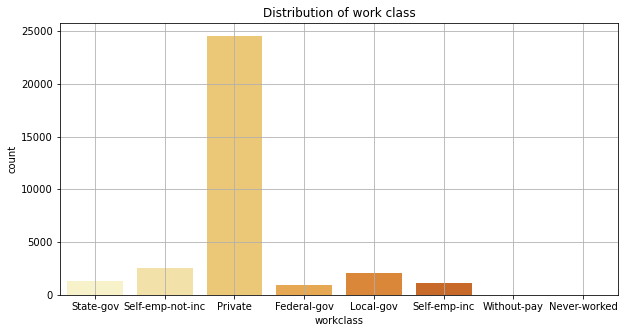

In [26]:
sns.countplot(x= data['workclass'],palette="YlOrBr")
plt.title('Distribution of work class')
plt.grid()
plt.show()

Private work classes make up the majority.

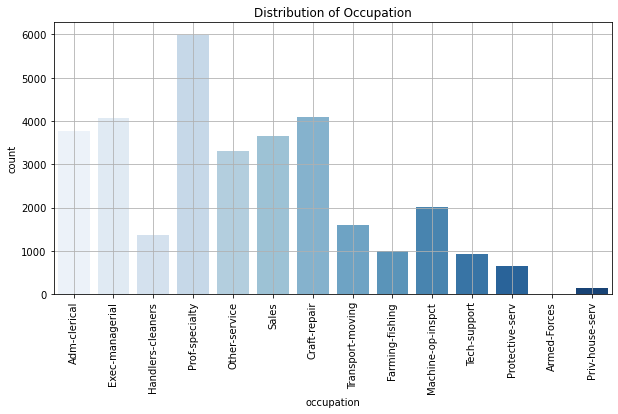

In [27]:
sns.countplot(x= data['occupation'],palette="Blues")
plt.title('Distribution of Occupation')
plt.xticks(rotation=90)
plt.grid()
plt.show()

The highest occupation distribution is prof-specialty.

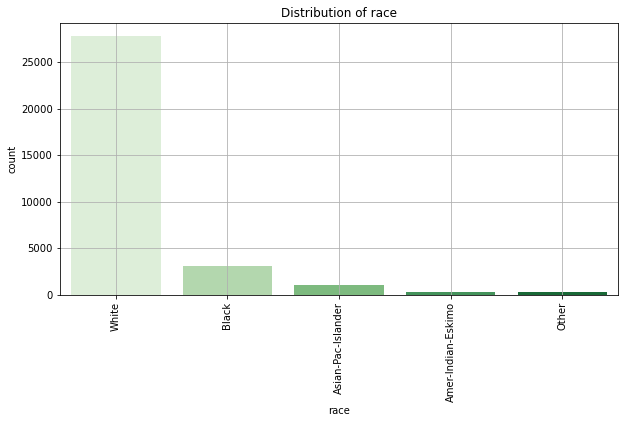

In [28]:
sns.countplot(x= data['race'],palette="Greens")
plt.title('Distribution of race')
plt.xticks(rotation=90)
plt.grid()
plt.show()

The dominant race is white.

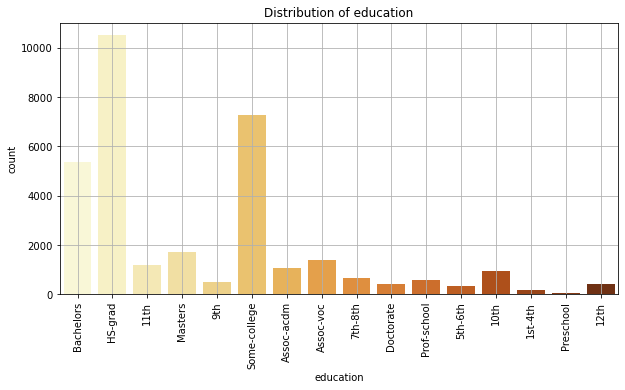

In [29]:
sns.countplot(x= data['education'],palette="YlOrBr")
plt.title('Distribution of education')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In education, high school graduates predominate.

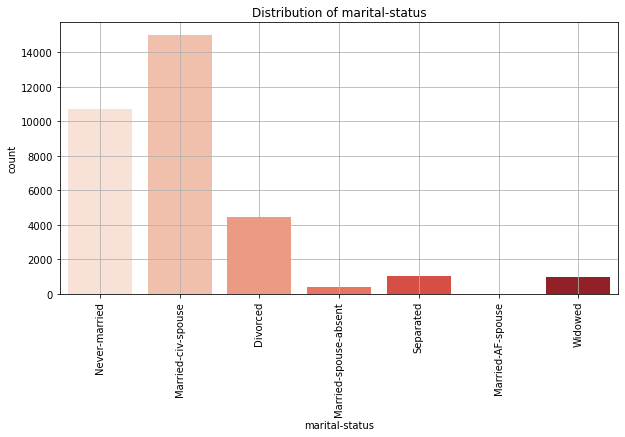

In [30]:
sns.countplot(x= data['marital-status'],palette="Reds")
plt.title('Distribution of marital-status')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

In marital status, majority is married-civ-spouse.

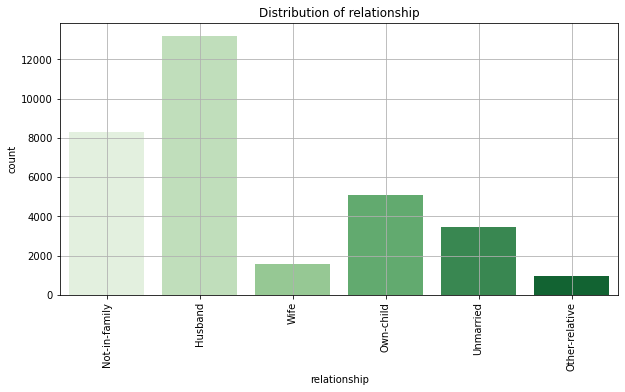

In [31]:
sns.countplot(x= data['relationship'],palette="Greens")
plt.title('Distribution of relationship')
plt.xticks(rotation = 90)
plt.grid()
plt.show()

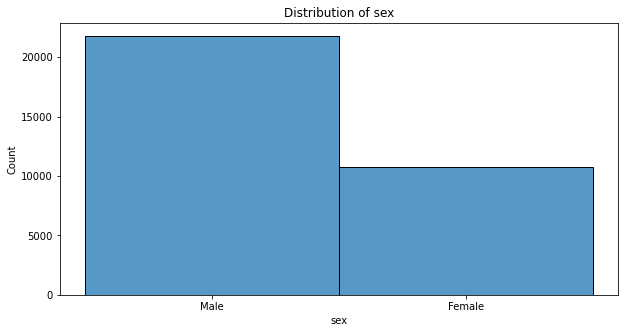

In [32]:
sns.histplot(data['sex'])
plt.title('Distribution of sex')
plt.show()

Males are the predominate sex.

### BIVARIATE ANALYSIS

Text(0.5, 1.0, 'Users by Salary and Gender')

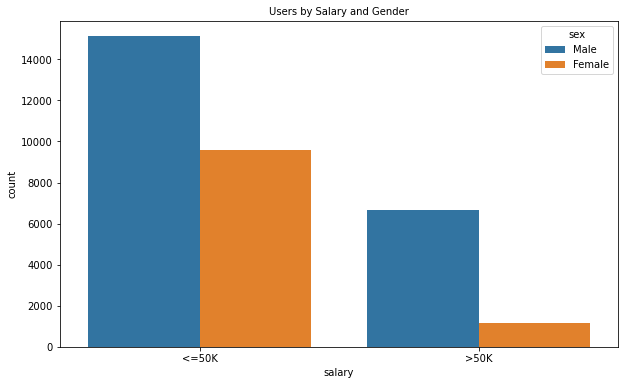

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='salary',hue='sex',data=data)
plt.title("Users by Salary and Gender", fontsize = 10)

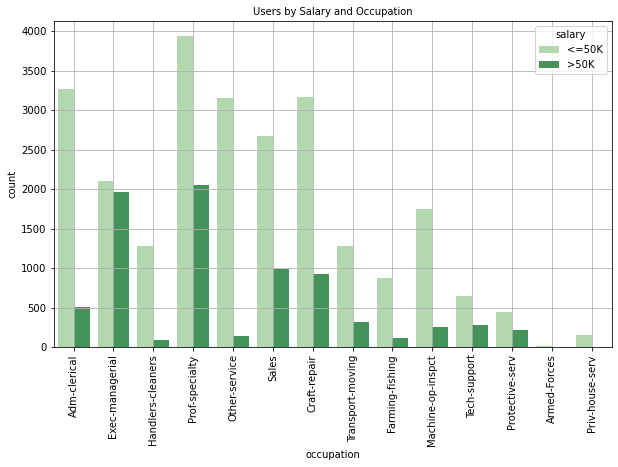

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(x='occupation',hue='salary',data=data,palette="Greens")
plt.title("Users by Salary and Occupation", fontsize = 10)
plt.xticks(rotation = 90)
plt.grid()

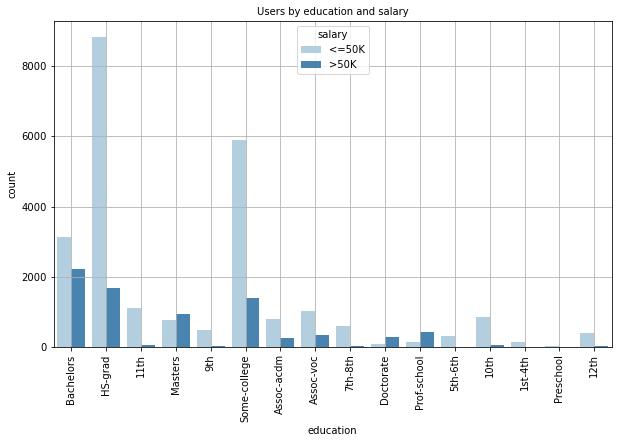

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x='education',hue='salary',data=data,palette="Blues")
plt.title("Users by education and salary", fontsize = 10)
plt.xticks(rotation = 90)
plt.grid()

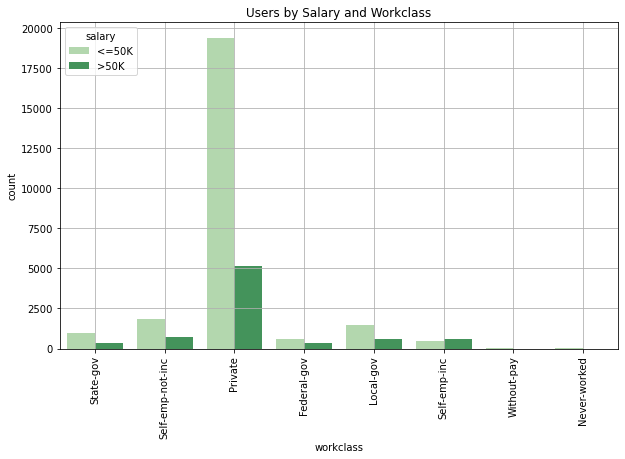

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x='workclass',hue='salary',data=data,palette="Greens")
plt.title("Users by Salary and Workclass", fontsize = 12)
plt.xticks(rotation = 90)
plt.grid()

### CORRELATION

<AxesSubplot:>

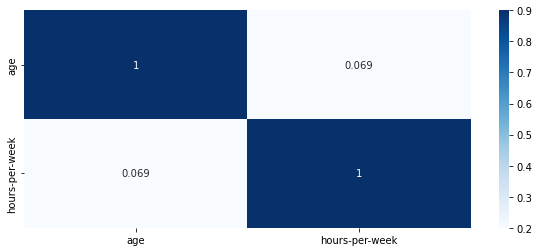

In [37]:
corrmatrix = data.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix, vmin=0.2, vmax=0.9, annot=True, cmap="Blues")

### OUTLIERS HANDLING

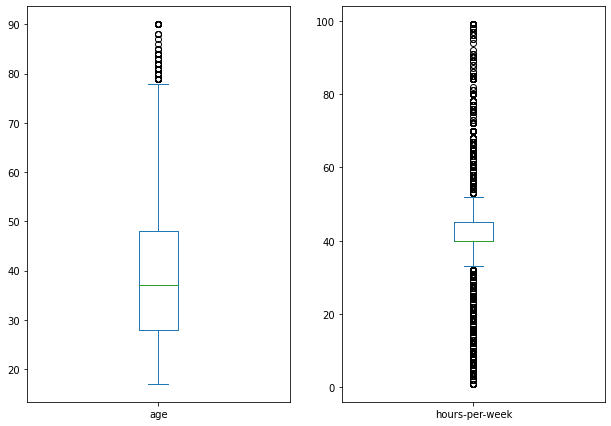

In [38]:
data.plot(kind='box',subplots=True,layout=(2,3),figsize=(16,16));

From the figure it is clear that age and hours-per-week have outliers. So we should remove it.

In [39]:
# Identify the outliers and remove 
for i in ['age', 'hours-per-week']:
    Q1=data[i].quantile(0.25) # 25th quantile
    Q3=data[i].quantile(0.75) # 75th quantile
    IQR = Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    data[i] = np.clip(data[i], Lower_Whisker, Upper_Whisker)

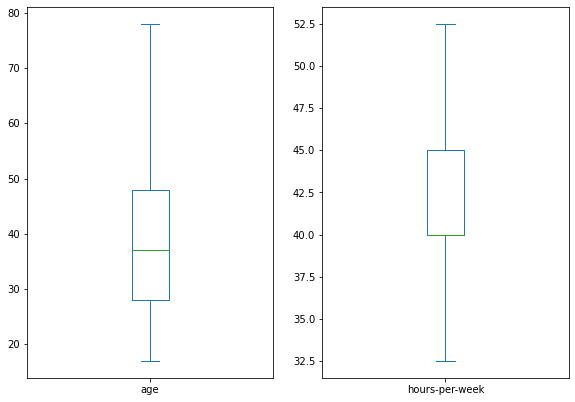

In [40]:
data.plot(kind='box',subplots=True,layout=(2,3),figsize=(15,15));

### ENCODING

In [41]:
## Mapping Salary

replace_map = {'salary': { '>50K': 1, '<=50K': 0} }

data.replace(replace_map, inplace=True)

##### LABEL ENCODING

In [42]:
#import library
from sklearn.preprocessing import LabelEncoder
#fit the model
label_encoder=LabelEncoder()

In [43]:
for i in ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country']:  
    data[i]=label_encoder.fit_transform(data[i])
    le_name_mapping =dict((zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
    print(le_name_mapping)

{'Federal-gov': 0, 'Local-gov': 1, 'Never-worked': 2, 'Private': 3, 'Self-emp-inc': 4, 'Self-emp-not-inc': 5, 'State-gov': 6, 'Without-pay': 7}
{'10th': 0, '11th': 1, '12th': 2, '1st-4th': 3, '5th-6th': 4, '7th-8th': 5, '9th': 6, 'Assoc-acdm': 7, 'Assoc-voc': 8, 'Bachelors': 9, 'Doctorate': 10, 'HS-grad': 11, 'Masters': 12, 'Preschool': 13, 'Prof-school': 14, 'Some-college': 15}
{'Divorced': 0, 'Married-AF-spouse': 1, 'Married-civ-spouse': 2, 'Married-spouse-absent': 3, 'Never-married': 4, 'Separated': 5, 'Widowed': 6}
{'Adm-clerical': 0, 'Armed-Forces': 1, 'Craft-repair': 2, 'Exec-managerial': 3, 'Farming-fishing': 4, 'Handlers-cleaners': 5, 'Machine-op-inspct': 6, 'Other-service': 7, 'Priv-house-serv': 8, 'Prof-specialty': 9, 'Protective-serv': 10, 'Sales': 11, 'Tech-support': 12, 'Transport-moving': 13}
{'Husband': 0, 'Not-in-family': 1, 'Other-relative': 2, 'Own-child': 3, 'Unmarried': 4, 'Wife': 5}
{'Amer-Indian-Eskimo': 0, 'Asian-Pac-Islander': 1, 'Black': 2, 'Other': 3, 'White':

In [44]:
data

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39.0,6,9,4,0,1,4,1,40.0,38,0
1,50.0,5,9,2,3,0,4,1,32.5,38,0
2,38.0,3,11,0,5,1,4,1,40.0,38,0
3,53.0,3,1,2,5,0,2,1,40.0,38,0
4,28.0,3,9,2,9,5,2,0,40.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,3,7,2,12,5,4,0,38.0,38,0
32557,40.0,3,11,2,6,0,4,1,40.0,38,1
32558,58.0,3,11,6,0,4,4,0,40.0,38,0
32559,22.0,3,11,4,0,3,4,1,32.5,38,0


### Splitting our data into train and test

In [45]:
X = data.drop('salary', axis= 1)
y= data['salary']

In [46]:
# split data into test and train
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)

### MODELS

#### 1. LOGISTIC REGRESSION MODEL

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logit_model = LogisticRegression()
logit_model = logit_model.fit(X_train, y_train)
y_pred_logit= logit_model.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score,classification_report

In [51]:
ac_lr = accuracy_score( y_test,y_pred_logit)

In [52]:
print('Accuracy:',ac_lr*100)

Accuracy: 76.66206049439582


In [53]:
print(classification_report(y_test, y_pred_logit))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      4942
           1       0.54      0.24      0.33      1571

    accuracy                           0.77      6513
   macro avg       0.67      0.59      0.59      6513
weighted avg       0.73      0.77      0.73      6513



### 2. kNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
metric_k=[]
neighbors= range(3,15)

for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k)
    classifier= classifier.fit(X_train,y_train)
    y_pred_kNN= classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred_kNN)
    metric_k.append(acc)

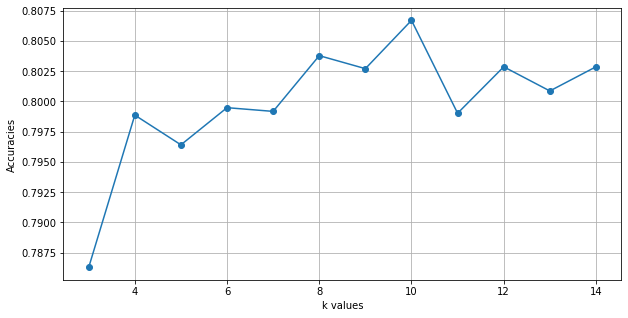

In [56]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()

In [57]:
classifier= KNeighborsClassifier(n_neighbors=5)
classifier= classifier.fit(X_train,y_train)
y_pred_kNN= classifier.predict(X_test)

In [58]:
ac_lr1 = accuracy_score(y_test,y_pred_kNN)

In [59]:
print(classification_report(y_test, y_pred_kNN))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      4942
           1       0.58      0.55      0.57      1571

    accuracy                           0.80      6513
   macro avg       0.72      0.71      0.72      6513
weighted avg       0.79      0.80      0.79      6513



In [60]:
print('Accuracy:',ac_lr1*100)

Accuracy: 79.64071856287424


### 3. SVM

In [61]:
from sklearn.svm import SVC

In [62]:
svm_clf2 = SVC(kernel = 'rbf')
svm_clf2 = svm_clf2.fit(X_train, y_train)
y_pred_svm2 = svm_clf2.predict(X_test)

In [63]:
ac_lr2 = accuracy_score(y_test, y_pred_svm2)

In [64]:
print(classification_report(y_test, y_pred_svm2))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      4942
           1       0.00      0.00      0.00      1571

    accuracy                           0.76      6513
   macro avg       0.38      0.50      0.43      6513
weighted avg       0.58      0.76      0.65      6513



In [65]:
print('Accuracy:',ac_lr2*100)

Accuracy: 75.87901120835252


### 4. DECISION TREE

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
dt = DecisionTreeClassifier(random_state=42,max_depth=8,min_samples_split=2)

dt = dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [68]:
ac_lr3 = accuracy_score (y_test, y_pred_dt)

In [69]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4942
           1       0.70      0.49      0.57      1571

    accuracy                           0.83      6513
   macro avg       0.77      0.71      0.73      6513
weighted avg       0.81      0.83      0.81      6513



In [70]:
print('Accuracy:',ac_lr3*100)

Accuracy: 82.55796100107477


### 5. RANDOM FOREST 

In [71]:
from sklearn.ensemble import RandomForestClassifier as rfClassifier

rf = rfClassifier(random_state=42,max_depth=15,min_samples_split=2)
rf.fit(X_train , y_train)
rf_pred = rf.predict(X_test)

In [72]:
ac_lr4 = accuracy_score (y_test,rf_pred)

In [73]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4942
           1       0.71      0.59      0.64      1571

    accuracy                           0.84      6513
   macro avg       0.79      0.76      0.77      6513
weighted avg       0.84      0.84      0.84      6513



In [74]:
print('Accuracy:',ac_lr4*100)

Accuracy: 84.30830646399508


### 6. Extreme Gradient Boosting (XGBoost)

In [75]:
import xgboost as xgb

In [76]:
# modeling 
xgboost = xgb.XGBClassifier()
xgboost= xgboost.fit(X_train, y_train)
xgb_pred = xgboost.predict(X_test)

In [77]:
ac_lr5 = accuracy_score (y_test,xgb_pred)

In [78]:
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4942
           1       0.70      0.60      0.65      1571

    accuracy                           0.84      6513
   macro avg       0.79      0.76      0.77      6513
weighted avg       0.84      0.84      0.84      6513



In [79]:
print('Accuracy:',ac_lr5*100)

Accuracy: 84.29295255642562


### 7. Light gbm

In [80]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [81]:
lgb_model = LGBMClassifier()
lgb_model.fit(X_train, y_train)
 
# Predicting the Target variable
lgb_pred = lgb_model.predict(X_test)

In [82]:
ac_lr6 = accuracy_score (y_test,lgb_pred)

In [83]:
print(classification_report(y_test, lgb_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4942
           1       0.72      0.61      0.66      1571

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.84      0.85      0.84      6513



In [84]:
print('Accuracy:',ac_lr6*100)

Accuracy: 84.79963150621833


### 8. CatBoost

In [85]:
from catboost import CatBoostClassifier

In [86]:
# modeling 
catboost = CatBoostClassifier()
catboost.fit(X_train, y_train)
cat_pred = catboost.predict(X_test)

Learning rate set to 0.041445
0:	learn: 0.6568096	total: 194ms	remaining: 3m 13s
1:	learn: 0.6260431	total: 204ms	remaining: 1m 41s
2:	learn: 0.5975695	total: 213ms	remaining: 1m 10s
3:	learn: 0.5729609	total: 222ms	remaining: 55.2s
4:	learn: 0.5530432	total: 230ms	remaining: 45.7s
5:	learn: 0.5343501	total: 239ms	remaining: 39.5s
6:	learn: 0.5173630	total: 247ms	remaining: 35s
7:	learn: 0.5033179	total: 255ms	remaining: 31.7s
8:	learn: 0.4911169	total: 264ms	remaining: 29.1s
9:	learn: 0.4798066	total: 272ms	remaining: 26.9s
10:	learn: 0.4699339	total: 280ms	remaining: 25.2s
11:	learn: 0.4601203	total: 289ms	remaining: 23.8s
12:	learn: 0.4517731	total: 298ms	remaining: 22.6s
13:	learn: 0.4447438	total: 306ms	remaining: 21.5s
14:	learn: 0.4374878	total: 314ms	remaining: 20.6s
15:	learn: 0.4311395	total: 323ms	remaining: 19.8s
16:	learn: 0.4259420	total: 331ms	remaining: 19.2s
17:	learn: 0.4206725	total: 339ms	remaining: 18.5s
18:	learn: 0.4156084	total: 347ms	remaining: 17.9s
19:	learn:

In [87]:
ac_lr7 = accuracy_score (y_test,cat_pred)

In [88]:
print(classification_report(y_test, cat_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4942
           1       0.71      0.61      0.65      1571

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513



In [89]:
print('Accuracy:',ac_lr7*100)

Accuracy: 84.5693228926762


## Model prediction Accuracy table

In [90]:
from tabulate import tabulate
table = [['Model', 'Accuracy'], ['Logistic Regression',ac_lr*100], ['KNN',ac_lr1*100],['Decision tree',ac_lr3*100],['Random Forest',ac_lr4*100],['SVM',ac_lr2*100],['XG Boost',ac_lr5*100],['Light GBM',ac_lr6*100],['Cat Boost',ac_lr7*100]]
print(tabulate(table,headers='firstrow',tablefmt='fancy_grid'))

╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ Logistic Regression │    76.6621 │
├─────────────────────┼────────────┤
│ KNN                 │    79.6407 │
├─────────────────────┼────────────┤
│ Decision tree       │    82.558  │
├─────────────────────┼────────────┤
│ Random Forest       │    84.3083 │
├─────────────────────┼────────────┤
│ SVM                 │    75.879  │
├─────────────────────┼────────────┤
│ XG Boost            │    84.293  │
├─────────────────────┼────────────┤
│ Light GBM           │    84.7996 │
├─────────────────────┼────────────┤
│ Cat Boost           │    84.5693 │
╘═════════════════════╧════════════╛


From the table, it is clear that Light GBM have better accuracy compared to others. So Light GBM is taken as our model to predict the salary. So we can tune this to check whether the performance is improving.

## Fine-tuning

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
#Define the hyperparameters
param_grid = {'n_estimators': [50, 60, 70],
              'num_leaves': [5, 10, 20]}

# Create the LightGBM classifier
lgb_model = LGBMClassifier()

# Set up the grid search
grid_search = GridSearchCV(lgb_model, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
# Print the best hyperparameters
best_model = grid_search.best_estimator_
lgb_scoret = best_model.score(X_test , y_test)
print(f"Best model:{best_model},accuracy is :{lgb_scoret*100:.2f}%")

Best model:LGBMClassifier(n_estimators=70, num_leaves=20),accuracy is :84.74%
